# ⚡ Z Score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
20,6.69,47.0,0
89,6.56,17.0,0
497,6.80,37.0,1
924,6.85,23.0,1
424,6.91,30.0,0


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


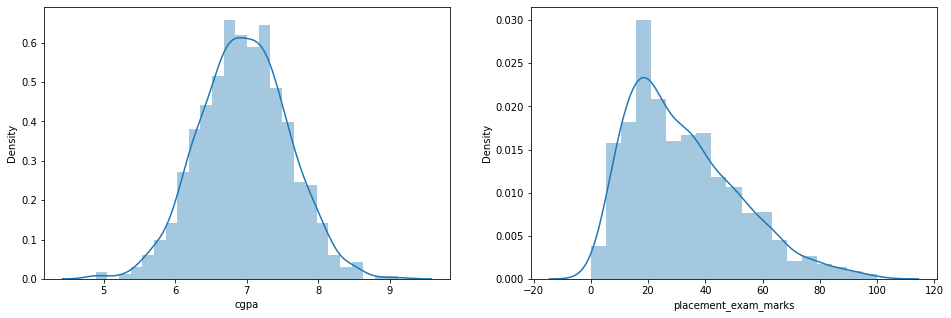

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [7]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [8]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [9]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [10]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### 📌 Trimming

In [15]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [16]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [17]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [18]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [19]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [20]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [21]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [22]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### 📌 Capping

In [23]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [24]:
lower_limit

5.113546374602832

In [25]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [26]:
df.shape

(1000, 4)

In [28]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64